In [3]:
#Importando las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#Leyendo la data
df_salary = pd.read_csv('../data/Levels_Fyi_Salary_data.csv')
df_salary.shape #Observamos los nombres de sus columnas

(62642, 29)

In [5]:
df_salary.columns

Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'otherdetails', 'cityid', 'dmaid',
       'rowNumber', 'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree',
       'Highschool', 'Some_College', 'Race_Asian', 'Race_White',
       'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic', 'Race', 'Education'],
      dtype='object')

In [6]:
#Seleccionamos las columnas con las que trabajaremos
selected_columns = ['company','title','totalyearlycompensation','location','yearsofexperience','yearsatcompany','tag','basesalary','stockgrantvalue',
                    'bonus','gender','Race','Education']

In [7]:
#Creamos una nueva tabla para trabajar con ella
df = df_salary[selected_columns].copy()
df.shape

(62642, 13)

In [8]:
df.describe().round(2)

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus
count,62642.00,62642.00,62642.00,62642.00,62642.00,62642.00
mean,216300.37,7.20,2.70,136687.28,51486.08,19334.75
std,138033.75,5.84,3.26,61369.28,81874.57,26781.29
min,10000.00,0.00,0.00,0.00,0.00,0.00
25%,135000.00,3.00,0.00,108000.00,0.00,1000.00
50%,188000.00,6.00,2.00,140000.00,25000.00,14000.00
75%,264000.00,10.00,4.00,170000.00,65000.00,26000.00
max,4980000.00,69.00,69.00,1659870.00,2800000.00,1000000.00


In [9]:
df.isnull().sum()

company                        5
title                          0
totalyearlycompensation        0
location                       0
yearsofexperience              0
yearsatcompany                 0
tag                          854
basesalary                     0
stockgrantvalue                0
bonus                          0
gender                     19540
Race                       40215
Education                  32272
dtype: int64

In [10]:
df.gender.unique() #Obervamos algo inusual dentro del género: "Título: Ingeniero de software senior"

array([nan, 'Male', 'Female', 'Other', 'Title: Senior Software Engineer'],
      dtype=object)

In [11]:
df.groupby(['gender']).count()

,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,Race,Education
gender,,,,,,,,,,,,
Female,6999,6999,6999,6999,6999,6999,6957,6999,6999,6999,4034,4910
Male,35698,35702,35702,35702,35702,35702,35399,35702,35702,35702,18166,22679
Other,400,400,400,400,400,400,398,400,400,400,111,177
Title: Senior Software Engineer,1,1,1,1,1,1,1,1,1,1,0,0


In [12]:
df = df.replace(to_replace='Title: Senior Software Engineer', value='No especificado')
df.groupby(['gender']).count() #Verificamos

,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,Race,Education
gender,,,,,,,,,,,,
Female,6999,6999,6999,6999,6999,6999,6957,6999,6999,6999,4034,4910
Male,35698,35702,35702,35702,35702,35702,35399,35702,35702,35702,18166,22679
No especificado,1,1,1,1,1,1,1,1,1,1,0,0
Other,400,400,400,400,400,400,398,400,400,400,111,177


In [13]:
#Como obersvamos que los valores nulos se encuentran dentro de las columnas de tipo texto, les hacemos un filtro básico
df_filtrado = df.fillna({'company':'No especificado','tag':'No especificado','gender':'No especificado','Race':'No especificado','Education':'No especificado',})
df = df_filtrado
df.isnull().sum()

company                    0
title                      0
totalyearlycompensation    0
location                   0
yearsofexperience          0
yearsatcompany             0
tag                        0
basesalary                 0
stockgrantvalue            0
bonus                      0
gender                     0
Race                       0
Education                  0
dtype: int64

<AxesSubplot:>

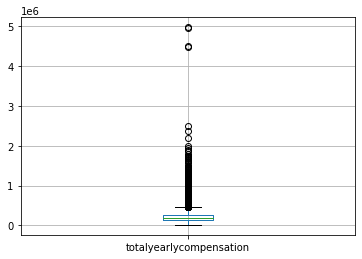

In [14]:
df.boxplot('totalyearlycompensation') #Se observa un sesgo en cuanto a la recolección de datos, contamos con demasiados valores atípicos

In [15]:
#Agrupamos las columnas con sus respectivos valores (numéricos y textos)
numeric_columns = df.select_dtypes(include=[float, int]).columns
text_columns = df.select_dtypes(include=[object]).columns

numeric_columns, text_columns

(Index(['totalyearlycompensation', 'yearsofexperience', 'yearsatcompany',
        'basesalary', 'stockgrantvalue', 'bonus'],
       dtype='object'),
 Index(['company', 'title', 'location', 'tag', 'gender', 'Race', 'Education'], dtype='object'))

In [16]:
#Identificamos los outliers
def encontrando_outliers(x, upper_limit):
    if x > upper_limit:
        return 1
    else: return 0

#Duplicamos las columnas que contienen outliers, identificándolos con el sufijo "_outliers"
for column in numeric_columns:
    upper_limit = df[column].mean() + 3 * df[column].std()
    df[column+"_outliers"] = df[column].apply(lambda x: encontrando_outliers(x, upper_limit))

In [17]:
#Agrupamos las columnas que contengan outliers
outlier_columns = [column for column in df.columns if "outlier" in column]
outlier_columns

['totalyearlycompensation_outliers',
 'yearsofexperience_outliers',
 'yearsatcompany_outliers',
 'basesalary_outliers',
 'stockgrantvalue_outliers',
 'bonus_outliers']

In [18]:
# Eliminamos los outliers
df["outlier"] = df[outlier_columns].sum(axis=1)
df = df[df["outlier"]==0].reset_index(drop=True).copy()

In [19]:
df = df.drop(outlier_columns+["outlier"], axis=1).copy()
df.shape

(58362, 13)

<AxesSubplot:>

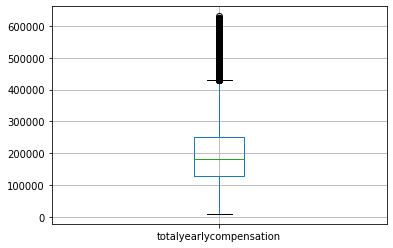

In [20]:
df.boxplot('totalyearlycompensation') #Comprobando la actualización sin outliers

In [21]:
df.to_csv('../data/Data_limpia.csv',index = False) #Guardando la data procesada